## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [ ]:
#import the libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sns.set_style('darkgrid')
import plotly.express as px

In [ ]:
# read CSV file
df=pd.read_csv('data/kc_house_data.csv')

In [ ]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [ ]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  17755.000000   
mean   1.509941e+04      1.494096   1788.596842   1970.999676     83.636778   
std    4.141264e+04      0.539683    827.759761     29.375234    399.946414   
min    5.200000e+02      1.000000    370.000000   1900.000000      0.000000   
25%    5.040000e+03      1.000000   1190.000000   1951.000000      0.000000   
50%    7.618000e+03      1.500000   1560.000000   1975.000000      0.000000   
75%    1.068500e+04      2.000000   2210.000000   1997.000000      0.000000   
max    1.651359e+06      3.500000   9410.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [ ]:
df.median()

id               3.904930e+09
price            4.500000e+05
bedrooms         3.000000e+00
bathrooms        2.250000e+00
sqft_living      1.910000e+03
sqft_lot         7.618000e+03
floors           1.500000e+00
sqft_above       1.560000e+03
yr_built         1.975000e+03
yr_renovated     0.000000e+00
zipcode          9.806500e+04
lat              4.757180e+01
long            -1.222310e+02
sqft_living15    1.840000e+03
sqft_lot15       7.620000e+03
dtype: float64

In [ ]:
df.drop(columns=['waterfront','yr_renovated','view','lat','long']) 
#dropped collumns to not use that data

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  condition          grade  sqft_above sqft_basement  \
0          5650     1.0    Average      7 Average        1180           0.0   
1          7242     2.0    Average      7 Average        2170         400.0   
2         10000     1.0    Average  6 Low Average         770           0.0   
3          5000     1.0  Very Good      7 Average        1050         910.0   
4          8080     1.0    Average         8 Good        1680           0.0   
...         ...     ...        ...            ...         ...           ...   
21592      1131     3.0    Average         8 Good        1530           0.0   
21593      5813     2.0    Average         8 Good        2310           0.0   
21594      1350     2.0    Average      7 Average        1020           0.0   
21595      2388     2.0    Average         8 Good        1600           0.0   
21596      1076     2.0    Average      7 Average        1020           0.0   

       yr_built  zipcode  sqft_living15  sqft_lot15  
0          1955    98178           1340        5650  
1          1951    98125           1690        7639  
2          1933    98028           2720        8062  
3          1965    98136           1360        5000  
4          1987    98074           1800        7503  
...         ...      ...            ...         ...  
21592      2009    98103           1530        1509  
21593      2014    98146           1830        7200  
21594      2009    98144           1020        2007  
21595      2004    98027           1410        1287  
21596      2008    98144           1020        1357  

[21597 rows x 16 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [ ]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [ ]:
df['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [ ]:
df['sqft_living'].value_counts()

1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64

# Data Exploration

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

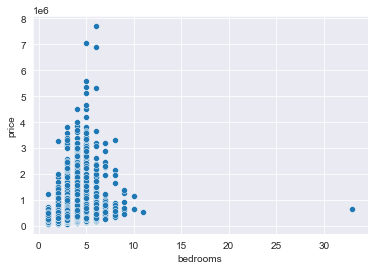

In [ ]:
sns.scatterplot(x = df['bedrooms'], y=df['price'])
#Optimum amount of bedrooms is 5-6

In [ ]:
#Checking for obvious outliers:
#bedrooms has an entry for 33 max bedrooms but the mean is 3.37. 
df.bedrooms.value_counts()

3     9825
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [ ]:
#Checking for obvious outliers:
#bedrooms has an entry for 33 max bedrooms but the mean is 3.37. 
#there's' only 1 house that has 33 bedrooms so we'll take a look at that specific row
df.loc[df['bedrooms'] > 12]

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]

In [ ]:
#since the above bedrooms entry with 33 bedrooms with 1.75 seems incorrect, we are going to update it to no of bedrooms = 3
df.loc[df['bedrooms'] > 12, 'bedrooms'] = 3

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

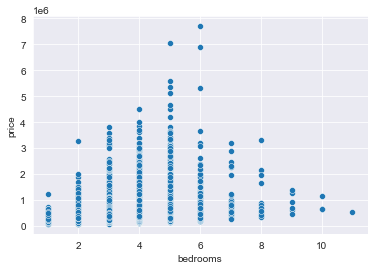

In [ ]:
sns.scatterplot(x = df['bedrooms'], y=df['price'])

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

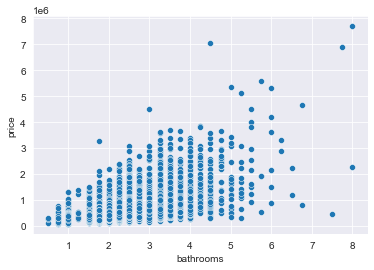

In [ ]:
#Scatterplot for bathrooms vs price
sns.scatterplot(x=df['bathrooms'], y=df['price'])


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

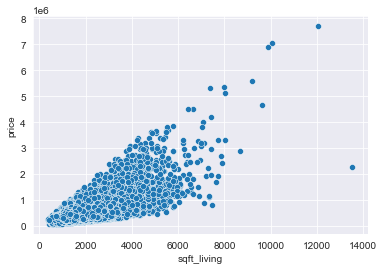

In [ ]:
#Scatterplot for sqft_living and price
sns.scatterplot(x=df['sqft_living'], y=df['price'])


In [ ]:
df['sqft_living'].max()

13540

In [ ]:
df.loc[df['sqft_living'] == 13540]

id      date      price  bedrooms  bathrooms  sqft_living  \
12764  1225069038  5/5/2014  2280000.0         7        8.0        13540   

       sqft_lot  floors waterfront       view  ...      grade sqft_above  \
12764    307752     3.0         NO  EXCELLENT  ...  12 Luxury       9410   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
12764         4130.0     1999           0.0    98053  47.6675 -121.986   

       sqft_living15  sqft_lot15  
12764           4850      217800  

[1 rows x 21 columns]

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

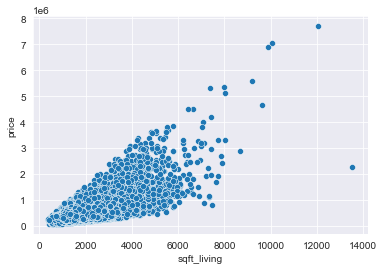

In [ ]:
sns.scatterplot(x=df['sqft_living'], y=df['price'])

### Target Variable:
Let's have a first look of the main statistics of the variable we are trying to predict: house prices.

In [ ]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [ ]:
price_median = df['price'].median()
price_median

450000.0

There is some informartion we can interpret here:
The mean value of homes of 540,296 is greater than the median of 450,000. This is an indication that the response variable is positively skewed. When this happens, regressing the log of price usually provides a better fitting, compared to the original price;
The maximum house price is listed as 7,700.000 and the minimum price is 78,000.

/Users/Ravinder/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



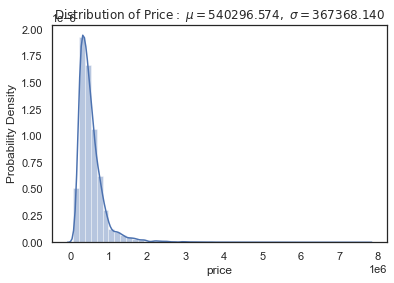

In [ ]:
mu = df['price'].mean()
sigma = df['price'].std()
plt.xlabel('House Price')
plt.ylabel('Probability Density')

plt.title(r'$\mathrm{Distribution\ of\ Price:}\ \mu=%.3f,\ \sigma=%.3f$'%(mu,sigma))
sns.distplot(df['price']);

In [ ]:
#Dropping the columns that will not be useful.
df.drop(columns=['id'], inplace=True)

df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014  221900.0         3       1.00         1180      5650     1.0   
1   12/9/2014  538000.0         3       2.25         2570      7242     2.0   
2   2/25/2015  180000.0         2       1.00          770     10000     1.0   
3   12/9/2014  604000.0         4       3.00         1960      5000     1.0   
4   2/18/2015  510000.0         3       2.00         1680      8080     1.0   

  waterfront  view  condition          grade  sqft_above sqft_basement  \
0        NaN  NONE    Average      7 Average        1180           0.0   
1         NO  NONE    Average      7 Average        2170         400.0   
2         NO  NONE    Average  6 Low Average         770           0.0   
3         NO  NONE  Very Good      7 Average        1050         910.0   
4         NO  NONE    Average         8 Good        1680           0.0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955           0.0    98178  47.5112 -122.257           1340   
1      1951        1991.0    98125  47.7210 -122.319           1690   
2      1933           NaN    98028  47.7379 -122.233           2720   
3      1965           0.0    98136  47.5208 -122.393           1360   
4      1987           0.0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503

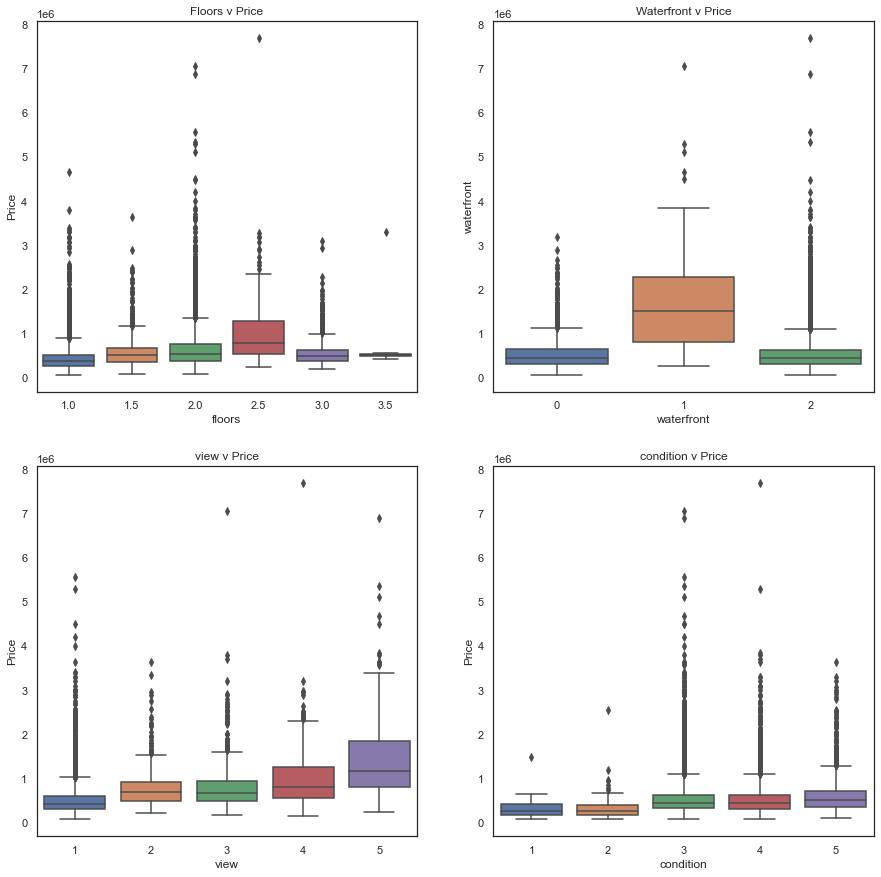

In [ ]:
# Suplots of categorical features v price

sns.set_style('white')
f, axes = plt.subplots(2,2, figsize = (15,15))


# Plot [0,0]
sns.boxplot(data = df, x = 'floors', y = 'price', ax = axes[0,0])
axes[0,0].set_xlabel('floors')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Floors v Price')

# Plot [0,1]
sns.boxplot(x = 'waterfront', y = 'price', data = df, ax = axes[0,1])
axes[0,1].set_xlabel('waterfront')
axes[0,1].set_ylabel('waterfront')
axes[0,1].set_title('Waterfront v Price')

# Plot [1,0]
sns.boxplot(x = 'view', y = 'price', data = df, ax = axes[1,0])
axes[1,0].set_xlabel('view')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('view v Price')

# Plot [1,1]
sns.boxplot(x = 'condition', y = 'price', data = df, ax = axes[1,1])
axes[1,1].set_xlabel('condition')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('condition v Price');


# Data cleaning:

Let's have a first look of the main statistics of the variable we are trying to predict: house prices.

In [ ]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

There is some informartion we can interpret here:
The mean value of homes of 540,296 is greater than the median of 450,000. This is an indication that the response variable is positively skewed. When this happens, regressing the log of price usually provides a better fitting, compared to the original price;
The maximum house price is listed as 7,700.000 and the minimum price is 78,000.

In [ ]:
#Look at the view column:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [ ]:
#We will check the view column to see how many null values it holds:
df['view'].isna().sum()

63

In [ ]:
#fill the null values with None:
df['view'] = df['view'].fillna('NONE')
df['view'].isna().sum()

0

Since view is a categorical data we are going to convert it into numerical data:

In [ ]:
# we are going to map our caterogical values to numerical values:
view_numerical = {'NONE': 1,
            'FAIR': 2,
             'AVERAGE':3,
            'GOOD': 4,
            'EXCELLENT': 5}
df['view'].replace(view_numerical, inplace=True)

In [ ]:
# let's look at where the houses with most excellent views are:
fig_view = px.scatter_mapbox(df[df['view']== 5],
                       lat='lat',
                       lon='long',
                       color='price',
                       zoom=7)
#plt.title('View')
fig_view.update_layout(mapbox_style='open-street-map')

plt.savefig('View.pdf')

fig_view.show()

<Figure size 432x288 with 0 Axes>

Checking for grade: This is also a categorical data we are going to replace it with numerical values.

In [ ]:
#checking for the values in grade columns:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [ ]:
#mapping these to numerical values:
grade_numerical = {'3 Poor': 3,
             '4 Low': 4,
             '5 Fair': 5,
             '6 Low Average': 6,
             '7 Average': 7,
             '8 Good': 8,
             '9 Better': 9,
             '10 Very Good': 10,
             '11 Excellent': 11,
             '12 Luxury': 12,
             '13 Mansion': 13 }
df['grade'].replace(grade_numerical,inplace = True)

In [ ]:
# We are goiing to check for condition column
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [ ]:
#mapping the categorical values to numerical valeus:
condition_numerical = {'Poor': 1,
             'Fair': 2,
             'Average': 3,
             'Good': 4,
             'Very Good': 5}
df['condition'].replace(condition_numerical,inplace = True)

In [ ]:
#Lets have a look at the waterfront column:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [ ]:
df['waterfront'].isna().sum()

2376

In [ ]:
#let's fill the waterfront missing values:
df['waterfront'] = df['waterfront'].fillna('NONE')
df['waterfront'].isna().sum()

0

In [ ]:
#We will map the values of NO,Yes to numerical values:
waterfront_numerical = {'NONE': 0,
                        'YES': 1,
                         'NO':2,
                        }
df['waterfront'].replace(waterfront_numerical,inplace = True)

In [ ]:
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014  221900.0         3       1.00         1180      5650     1.0   
1   12/9/2014  538000.0         3       2.25         2570      7242     2.0   
2   2/25/2015  180000.0         2       1.00          770     10000     1.0   
3   12/9/2014  604000.0         4       3.00         1960      5000     1.0   
4   2/18/2015  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above sqft_basement  yr_built  \
0           0     1          3      7        1180           0.0      1955   
1           2     1          3      7        2170         400.0      1951   
2           2     1          3      6         770           0.0      1933   
3           2     1          5      7        1050         910.0      1965   
4           2     1          3      8        1680           0.0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0           0.0    98178  47.5112 -122.257           1340        5650  
1        1991.0    98125  47.7210 -122.319           1690        7639  
2           NaN    98028  47.7379 -122.233           2720        8062  
3           0.0    98136  47.5208 -122.393           1360        5000  
4           0.0    98074  47.6168 -122.045           1800        7503

In [ ]:
df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   5.402966e+05      3.371811      2.115826   2080.321850  1.509941e+04   
std    3.673681e+05      0.904096      0.768984    918.106125  4.141264e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.220000e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068500e+04   
max    7.700000e+06     11.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       1.494096      1.773209      1.233181      3.409825      7.657915   
std        0.539683      0.628813      0.764673      0.650546      1.173200   
min        1.000000      0.000000      1.000000      1.000000      3.000000   
25%        1.000000      2.000000      1.000000      3.000000      7.000000   
50%        1.500000      2.000000      1.000000      3.000000      7.000000   
75%        2.000000      2.000000      1.000000      4.000000      8.000000   
max        3.500000      2.000000      5.000000      5.000000     13.000000   

         sqft_above      yr_built  yr_renovated       zipcode           lat  \
count  21597.000000  21597.000000  17755.000000  21597.000000  21597.000000   
mean    1788.596842   1970.999676     83.636778  98077.951845     47.560093   
std      827.759761     29.375234    399.946414     53.513072      0.138552   
min      370.000000   1900.000000      0.000000  98001.000000     47.155900   
25%     1190.000000   1951.000000      0.000000  98033.000000     47.471100   
50%     1560.000000   1975.000000      0.000000  98065.000000     47.571800   
75%     2210.000000   1997.000000      0.000000  98118.000000     47.678000   
max     9410.000000   2015.000000   2015.000000  98199.000000     47.777600   

               long  sqft_living15     sqft_lot15  
count  21597.000000   21597.000000   21597.000000  
mean    -122.213982    1986.620318   12758.283512  
std        0.140724     685.230472   27274.441950  
min     -122.519000     399.000000     651.000000  
25%     -122.328000    1490.000000    5100.000000  
50%     -122.231000    1840.000000    7620.000000  
75%     -122.125000    2360.000000   10083.000000  
max     -121.315000    6210.000000  871200.000000

we want to see where the houses with mean prices lie:
Mean of house prices is around 540,000.

In [ ]:
fig = px.scatter_mapbox(df[df['price'] < 600000],
                       lat='lat',
                       lon='long',
                       color='price',
                       zoom=8)
fig.update_layout(mapbox_style='open-street-map')
plt.savefig('Mean_house_locations.pdf')
fig.show()

<Figure size 432x288 with 0 Axes>

The above figure shows the areas that contain house's with mean prices of around 540,000 which seems to be mostly conecntrated around Redmond,Sammamish,Issaquah.

We will take a look at the scatter plots of each variable compared to price to see if there are any linear trends.
We look at continuous and categorical variables separately.

IndexError: list index out of range

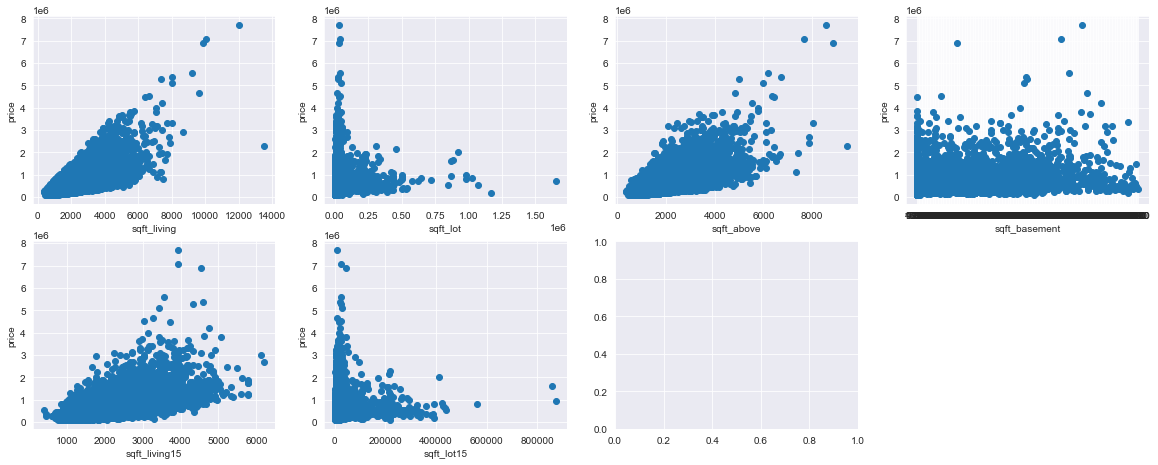

In [ ]:
#Let's look at continous variables first:
cont_columns = [ 'sqft_living', 'sqft_lot',
               'sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15']
plt.figure(figsize=(20,20))
for i in range(0, 10):
    plt.subplot(5, 4, i+1)
    if i > 8:
        break
    plt.scatter(df[cont_columns[i]], df['price'])
    plt.xlabel(cont_columns[i])
    plt.ylabel('price')
plt.savefig('Continous_variables_linearTrends.pdf')    
plt.tight_layout()

Looking at the scatter plots we can observe that sqft_living has a positive correlation with Price(given few outliers). As thes size of house increases it tends to cost more.
Lot sizes seem to be negatively correlated with housing prices.
Suprisingly, sqft_basement do not seem to have a strong correlation with price.
Sqft_above has a high positive coorelation with price indicating that people prefer houses with more living space than basement.

IndexError: list index out of range

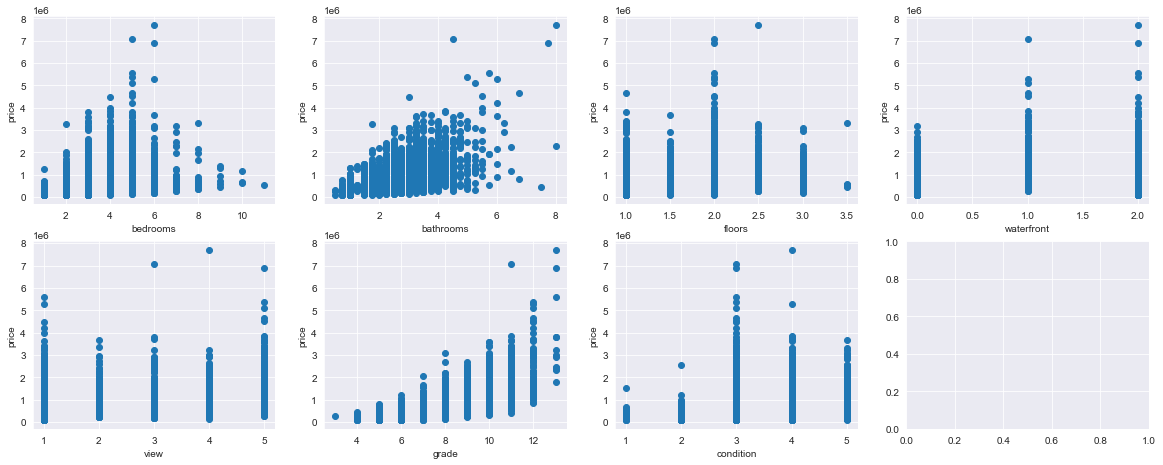

In [ ]:
#Lets have a look at catergorical data columns:
categorical_columns =  [ 'bedrooms', 'bathrooms',
               'floors', 'waterfront','view', 'grade','condition']
plt.figure(figsize=(20,20))
for i in range(0, 10):
    plt.subplot(5, 4, i+1)
    if i > 8:
        break
    plt.scatter(df[categorical_columns[i]], df['price'])
    plt.xlabel(categorical_columns[i])
    plt.ylabel('price')
plt.savefig('Categorical_variables_linearTrends.pdf')    
plt.tight_layout()

This categorical scatter plot shows us the positive coorelation between Bathrooms and grade. 
The number of bedrooms is linear up to 6 bedrooms. 
Also, Condition of a house is linear till 3 and then it starts to decrease.
The linearity for the number of bathrooms becomes less consistent for houses with more than 5 bathrooms.

In [ ]:
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014  221900.0         3       1.00         1180      5650     1.0   
1   12/9/2014  538000.0         3       2.25         2570      7242     2.0   
2   2/25/2015  180000.0         2       1.00          770     10000     1.0   
3   12/9/2014  604000.0         4       3.00         1960      5000     1.0   
4   2/18/2015  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above sqft_basement  yr_built  \
0           0     1          3      7        1180           0.0      1955   
1           2     1          3      7        2170         400.0      1951   
2           2     1          3      6         770           0.0      1933   
3           2     1          5      7        1050         910.0      1965   
4           2     1          3      8        1680           0.0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0           0.0    98178  47.5112 -122.257           1340        5650  
1        1991.0    98125  47.7210 -122.319           1690        7639  
2           NaN    98028  47.7379 -122.233           2720        8062  
3           0.0    98136  47.5208 -122.393           1360        5000  
4           0.0    98074  47.6168 -122.045           1800        7503

### Now, that our dataframe is ready we are going to start building our model:

Model Building
Before running a regression model with this data, we need to select which variables we believe will be the best predictors. We can eliminate variables by looking at collinearity between variables and choosing to drop one of those variables. We will choose to use a Pearson's correlation coefficient of 0.7 as the initial cutoff value.

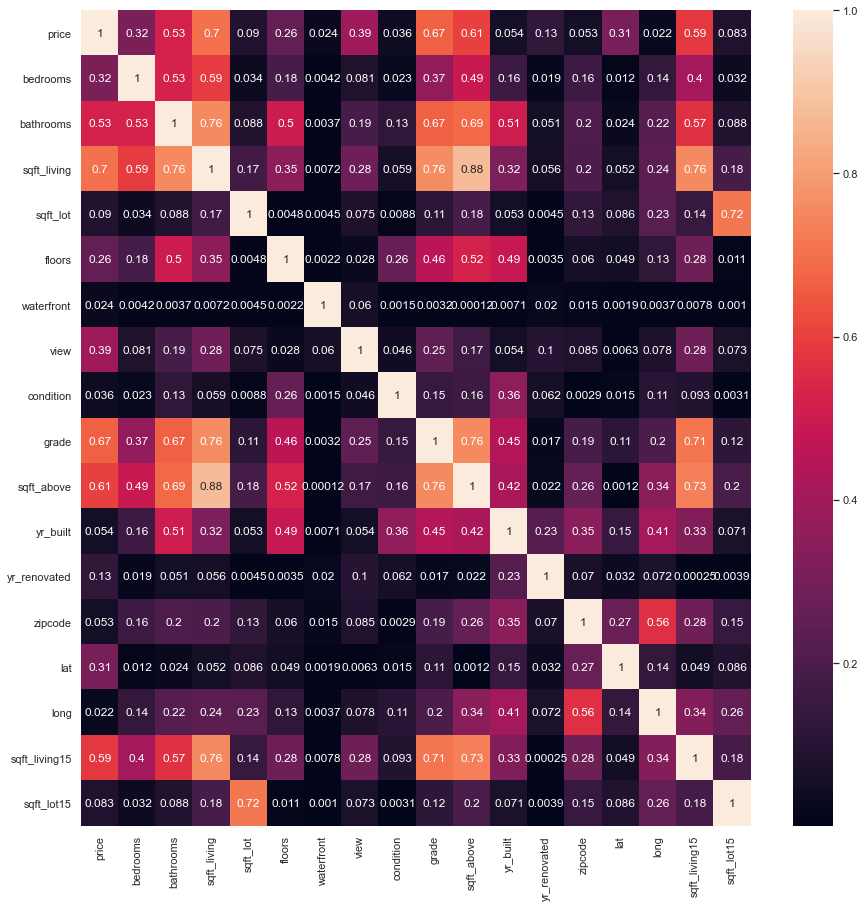

In [ ]:
plt.figure(figsize = (15,15))
sns.set(style = "white")
sns.heatmap(df.corr().abs(), annot = True)
plt.savefig("Intial_Heatmap")

HeatMap Analysis:

### Construction of Models:
structure of my model for baseline for comparisons
## Model1:
df_model = 'price ~ 'sqft_living', 'bedrooms','bathrooms','floors','view'

## Model2:
df_model2 = price'sqft_living','bedrooms','bathrooms','floors','view','grade','yr_built',
            sqft_basement,'yr_renovated,'waterfront','condition',sqft_lot'            

## Test/Train Split: Model 1

In [ ]:
#Selecting the features we are interested in:
df_model1 = df.drop(['sqft_lot','waterfront', 'condition', 'grade', 'sqft_above', 'yr_built', 'sqft_basement','yr_renovated', 'zipcode', 'lat','long','sqft_living15','sqft_lot15'],axis=1)

In [ ]:
df_model1

date     price  bedrooms  bathrooms  sqft_living  floors  view
0      10/13/2014  221900.0         3       1.00         1180     1.0     1
1       12/9/2014  538000.0         3       2.25         2570     2.0     1
2       2/25/2015  180000.0         2       1.00          770     1.0     1
3       12/9/2014  604000.0         4       3.00         1960     1.0     1
4       2/18/2015  510000.0         3       2.00         1680     1.0     1
...           ...       ...       ...        ...          ...     ...   ...
21592   5/21/2014  360000.0         3       2.50         1530     3.0     1
21593   2/23/2015  400000.0         4       2.50         2310     2.0     1
21594   6/23/2014  402101.0         2       0.75         1020     2.0     1
21595   1/16/2015  400000.0         3       2.50         1600     2.0     1
21596  10/15/2014  325000.0         2       0.75         1020     2.0     1

[21597 rows x 7 columns]

Test Train Split: 20% of our data shall be used for testing and 80% will be used for training.

In [ ]:
X = df_model1.drop('price', axis=1)
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

date  bedrooms  bathrooms  sqft_living  floors  view
6243   12/22/2014         4       2.00         1440     2.0     1
8986    5/12/2015         3       1.75         1430     1.0     3
9419   12/29/2014         4       2.75         3120     2.0     1
10155   3/21/2015         4       2.50         2060     1.0     1
10436    7/1/2014         3       2.00         2500     1.5     1
...           ...       ...        ...          ...     ...   ...
11964   9/15/2014         3       2.50         2230     2.0     1
21575   10/2/2014         4       2.75         2770     2.0     1
5390    7/21/2014         4       1.50         1530     1.0     1
860     6/20/2014         1       0.75          380     1.0     1
15795   3/25/2015         4       2.50         2755     2.0     1

[17277 rows x 6 columns]

## Modeless Baseline: Model 1

In [ ]:
base_train_mean = y_train.mean()
base_train_mean

541519.0094345083

In [ ]:
base_train_preds = [base_train_mean] * len(y_train)
base_test_preds = [base_train_mean] * len(y_test)

In [ ]:
print(f"Train R2: {r2_score(y_train, base_train_preds)}")
print(f"Test R2: {r2_score(y_test, base_test_preds)}")
print('----')
print(f"Train RMSE: {mean_squared_error(y_train, base_train_preds, squared = False)}")
print(f"Test RMSE: {mean_squared_error(y_test, base_test_preds, squared = False)}")

Train R2: 0.0
Test R2: -0.00028681792529150485
----
Train RMSE: 368958.0485742971
Test RMSE: 360906.67557791865


**This baseline model predicts that each house would have a value of the mean for this area. Since the model has a very low R2 and predicts that this is off by ~361 thousand dollars on average.**

## Independent Variables & Their Relation To Price: Model 1

In [ ]:
# create a dataframe for training data
df_train1 =pd.concat([y_train, X_train], axis = 1)
df_train1

price        date  bedrooms  bathrooms  sqft_living  floors  view
6243   332500.0  12/22/2014         4       2.00         1440     2.0     1
8986   390000.0   5/12/2015         3       1.75         1430     1.0     3
9419   800000.0  12/29/2014         4       2.75         3120     2.0     1
10155  462000.0   3/21/2015         4       2.50         2060     1.0     1
10436  695000.0    7/1/2014         3       2.00         2500     1.5     1
...         ...         ...       ...        ...          ...     ...   ...
11964  440000.0   9/15/2014         3       2.50         2230     2.0     1
21575  572000.0   10/2/2014         4       2.75         2770     2.0     1
5390   299800.0   7/21/2014         4       1.50         1530     1.0     1
860    245000.0   6/20/2014         1       0.75          380     1.0     1
15795  545000.0   3/25/2015         4       2.50         2755     2.0     1

[17277 rows x 7 columns]

In [ ]:
df_model1.corr()['price'].sort_values(ascending=False)

price          1.000000
sqft_living    0.701917
bathrooms      0.525906
view           0.393497
bedrooms       0.315954
floors         0.256804
Name: price, dtype: float64

Out of the 3 variables we compared to price, sqft_living has the highest correlation.



<AxesSubplot:>

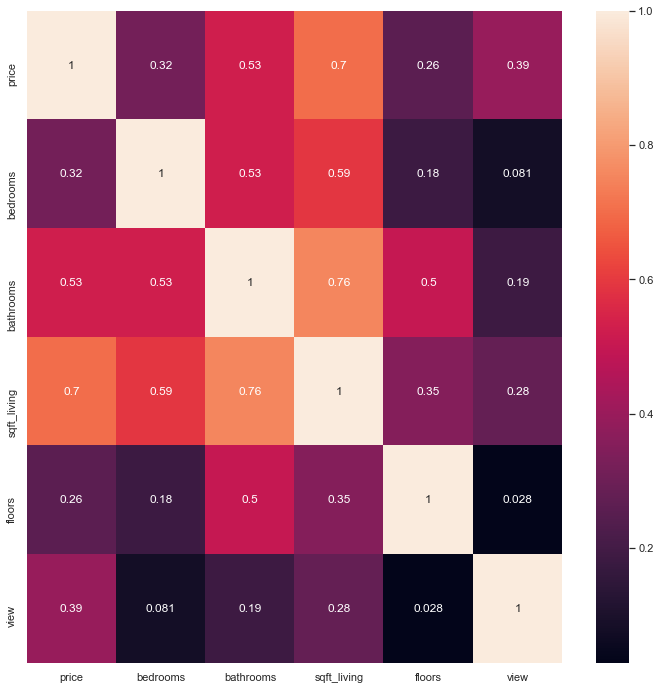

In [ ]:
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df_model1.corr(), annot=True)

# Modeling: 
Model1
##### We will run a base model:
Sqft_living has the highest correlation with price so this shall be used for our model.



In [ ]:
model_price='price ~ sqft_living'
model_price = ols(model_price, df_model1).fit()
model_price_summ = model_price.summary()
model_price_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        06:32:34   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model_price_train_preds = model_price.predict(X_train)
model_price_test_preds = model_price.predict(X_test)

In [ ]:
print(f"Train R2: {r2_score(y_train, model_price_train_preds)}")
print(f"Test R2: {r2_score(y_test, model_price_test_preds)}")
print('----')
print(f"Train RMSE: {mean_squared_error(y_train, model_price_train_preds, squared = False)}")
print(f"Test RMSE: {mean_squared_error(y_test, model_price_test_preds, squared = False)}")

Train R2: 0.49248102591707754
Test R2: 0.4934364209286598
----
Train RMSE: 262847.0640099154
Test RMSE: 256832.28945676197


Interpretation of the above model:

model_price1 shows variation over the base model:
R2 is 0.492 for training and 0.493 for test.
As for our model R2 seems low but RMSE is still high.
We will need to perform more iterations.

In [ ]:
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014  221900.0         3       1.00         1180      5650     1.0   
1   12/9/2014  538000.0         3       2.25         2570      7242     2.0   
2   2/25/2015  180000.0         2       1.00          770     10000     1.0   
3   12/9/2014  604000.0         4       3.00         1960      5000     1.0   
4   2/18/2015  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above sqft_basement  yr_built  \
0           0     1          3      7        1180           0.0      1955   
1           2     1          3      7        2170         400.0      1951   
2           2     1          3      6         770           0.0      1933   
3           2     1          5      7        1050         910.0      1965   
4           2     1          3      8        1680           0.0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0           0.0    98178  47.5112 -122.257           1340        5650  
1        1991.0    98125  47.7210 -122.319           1690        7639  
2           NaN    98028  47.7379 -122.233           2720        8062  
3           0.0    98136  47.5208 -122.393           1360        5000  
4           0.0    98074  47.6168 -122.045           1800        7503

# Multiple Regression: Model 1

Since,we will be iterating the model to train let's create functions to do that work.

In [ ]:
#this function will take variables and will give us the OLS results.
def model_base(ind_var, data):
    formula = 'price ~ ' + ' + '.join(ind_var)
    model_fit = ols(formula, data).fit()
    model_fit_summ = model_fit.summary()
    return model_fit,model_fit_summ

In [ ]:
# function that does the assessment of the model
def assess(model):
    
    train_preds=model.predict(X_train)
    test_preds=model.predict(X_test)
    y_tr = y_train
    y_te = y_test
    print(f"Train R2: {r2_score(y_tr, train_preds)}")
    print(f"Test R2: {r2_score(y_te, test_preds)}")
    print('----')
    print(f"Train RMSE: {mean_squared_error(y_tr, train_preds, squared = False)}")
    print(f"Test RMSE: {mean_squared_error(y_te, test_preds, squared = False)}")

In [ ]:
# the main function to model and asses the results
def main_model(ind_var,data):
    multi_model, multi_model_summ = model_base(ind_var,data)
    assessment = assess(multi_model)
    #scaled_summ = scaled_model(ind_var,data)
    print('        ')
    print('Model Summary:')
    print('        ')
    print(multi_model_summ)      
    print('        ')
    print('....................................................')
    print('Corelation Table between variables')
    print(data[ind_var].corr())    
    print('        ')
    print(assessment)

In [ ]:
main_model(['sqft_living'],df_model1)

Train R2: 0.49248102591707754
Test R2: 0.4934364209286598
----
Train RMSE: 262847.0640099154
Test RMSE: 256832.28945676197
        
Model Summary:
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        06:32:45   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t

Since, we want to keep our regression model simple we will add one more feature to our data: bedrooms
and see how the model performs.

In [ ]:
#testing the model with 2 variables.
main_model(['sqft_living', 'bedrooms'],df_model1)

Train R2: 0.5080571860169638
Test R2: 0.508911993981195
----
Train RMSE: 258782.1395230861
Test RMSE: 252878.73250251313
        
Model Summary:
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                 1.116e+04
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        06:32:47   Log-Likelihood:            -2.9973e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21594   BIC:                         5.995e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t| 

Adding bedrooms to the model has increased the R2 for training set from 0.492 to 0.508 and from 0.493 to 0.508.
But RMSE value seems to be high so we iterate the model again.

In [ ]:
#let's try adding bathrooms as well
main_model(['sqft_living', 'bedrooms','bathrooms'],df_model1)

Train R2: 0.5082516969052493
Test R2: 0.5088420909047208
----
Train RMSE: 258730.9741040499
Test RMSE: 252896.72965593002
        
Model Summary:
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     7443.
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        06:32:49   Log-Likelihood:            -2.9972e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21593   BIC:                         5.995e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|

Adding bathrooms doesn't seem to make any significant difference in the R2 values,let's look at other features.

In [ ]:
#let's try adding floors:
main_model(['sqft_living', 'bedrooms','bathrooms','floors','view'],df_model1)

Train R2: 0.5455799855231387
Test R2: 0.5442968344620447
----
Train RMSE: 248717.1394941069
Test RMSE: 243597.97013163957
        
Model Summary:
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     5180.
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        06:32:51   Log-Likelihood:            -2.9888e+05
No. Observations:               21597   AIC:                         5.978e+05
Df Residuals:                   21591   BIC:                         5.978e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|

Adding floors and view has increased the R2 from 0.50 to 0.54 in training data and from 0.50 to 0.544 in test.
Since, models efficiency doesn't seems to increase we want to transform and scale the data before iterating again.
We will perform log transformations (base e) on all continuous variables as well as the target. Categorical variables will remain as is.

In [ ]:
df_log = pd.DataFrame()
df_log['price'] = df_model1['price'].map(lambda x: np.log(x))
df_log['sqft_living'] = df_model1['sqft_living'].map(lambda x: np.log(x))
df_log['bedrooms'] = df_model1['bedrooms']
df_log['bathrooms'] = df_model1['bathrooms']
df_log['floors'] = df_model1['floors']
df_log['view'] = df_model1['view']
df_log.head()

price  sqft_living  bedrooms  bathrooms  floors  view
0  12.309982     7.073270         3       1.00     1.0     1
1  13.195614     7.851661         3       2.25     2.0     1
2  12.100712     6.646391         2       1.00     1.0     1
3  13.311329     7.580700         4       3.00     1.0     1
4  13.142166     7.426549         3       2.00     1.0     1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_log)
scaled_df = pd.DataFrame(scaled)
column_dict = dict(zip(scaled_df.columns, df_log.columns))

scaled_df.rename(columns=column_dict, inplace=True)
scaled_df.head()

price  sqft_living  bedrooms  bathrooms  floors  view
0  0.227669     0.322166       0.2   0.066667     0.0   0.0
1  0.420522     0.538392       0.2   0.233333     0.4   0.0
2  0.182099     0.203585       0.1   0.066667     0.0   0.0
3  0.445720     0.463123       0.3   0.333333     0.0   0.0
4  0.408883     0.420302       0.2   0.200000     0.0   0.0

In [ ]:
main_model(['sqft_living', 'bedrooms','bathrooms','floors','view'],scaled_df)

Train R2: -2.1419346557176673
Test R2: -2.1889062318817594
----
Train RMSE: 653996.7090220626
Test RMSE: 644397.0105036908
        
Model Summary:
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     4385.
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        06:33:43   Log-Likelihood:                 23698.
No. Observations:               21597   AIC:                        -4.738e+04
Df Residuals:                   21591   BIC:                        -4.734e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t

### Model2:

We will be looking at other categorical variable like grade, condition, waterfront how they work with price.

In [ ]:
#Since for this Model2 we need a new dataframe so we will be uploading and making a new test and training set.
df

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      10/13/2014  221900.0         3       1.00         1180      5650   
1       12/9/2014  538000.0         3       2.25         2570      7242   
2       2/25/2015  180000.0         2       1.00          770     10000   
3       12/9/2014  604000.0         4       3.00         1960      5000   
4       2/18/2015  510000.0         3       2.00         1680      8080   
...           ...       ...       ...        ...          ...       ...   
21592   5/21/2014  360000.0         3       2.50         1530      1131   
21593   2/23/2015  400000.0         4       2.50         2310      5813   
21594   6/23/2014  402101.0         2       0.75         1020      1350   
21595   1/16/2015  400000.0         3       2.50         1600      2388   
21596  10/15/2014  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  grade  sqft_above sqft_basement  \
0         1.0           0     1          3      7        1180           0.0   
1         2.0           2     1          3      7        2170         400.0   
2         1.0           2     1          3      6         770           0.0   
3         1.0           2     1          5      7        1050         910.0   
4         1.0           2     1          3      8        1680           0.0   
...       ...         ...   ...        ...    ...         ...           ...   
21592     3.0           2     1          3      8        1530           0.0   
21593     2.0           2     1          3      8        2310           0.0   
21594     2.0           2     1          3      7        1020           0.0   
21595     2.0           0     1          3      8        1600           0.0   
21596     2.0           2     1          3      7        1020           0.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955           0.0    98178  47.5112 -122.257           1340   
1          1951        1991.0    98125  47.7210 -122.319           1690   
2          1933           NaN    98028  47.7379 -122.233           2720   
3          1965           0.0    98136  47.5208 -122.393           1360   
4          1987           0.0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21592      2009           0.0    98103  47.6993 -122.346           1530   
21593      2014           0.0    98146  47.5107 -122.362           1830   
21594      2009           0.0    98144  47.5944 -122.299           1020   
21595      2004           0.0    98027  47.5345 -122.069           1410   
21596      2008           0.0    98144  47.5941 -122.299           1020   

       sqft_lot15  
0            5650  
1            7639  
2            8062  
3            5000  
4            7503  
...           ...  
21592        1509  
21593        7200  
21594        2007  
21595        1287  
21596        1357  

[21597 rows x 20 columns]

In [ ]:
X = df.drop('price', axis=1)
y= df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
6405     3/4/2015         3       2.50         1880      4499     2.0   
937     10/7/2014         3       2.50         2020      6564     1.0   
19076   1/16/2015         5       4.00         4720    493534     2.0   
15201   3/30/2015         2       2.00         1430      3880     1.0   
13083  10/14/2014         3       2.25         2270     32112     1.0   
...           ...       ...        ...          ...       ...     ...   
11964   9/15/2014         3       2.50         2230      5800     2.0   
21575   10/2/2014         4       2.75         2770      3852     2.0   
5390    7/21/2014         4       1.50         1530      9000     1.0   
860     6/20/2014         1       0.75          380     15000     1.0   
15795   3/25/2015         4       2.50         2755     11612     2.0   

       waterfront  view  condition  grade  sqft_above sqft_basement  yr_built  \
6405            2     1          3      8        1880           0.0      1993   
937             2     1          3      7        1310         710.0      1994   
19076           2     1          5      9        3960         760.0      1975   
15201           2     1          4      7        1430           0.0      1949   
13083           2     1          4      8        1740         530.0      1980   
...           ...   ...        ...    ...         ...           ...       ...   
11964           2     1          3      7        2230           0.0      2004   
21575           2     1          3      8        2770           0.0      2014   
5390            2     1          4      6        1530           0.0      1976   
860             2     1          3      5         380           0.0      1963   
15795           2     1          3      8        2755           0.0      2001   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
6405            0.0    98029  47.5664 -121.999           2130        5114  
937             0.0    98042  47.3545 -122.158           1710        5151  
19076           0.0    98027  47.4536 -122.009           2160      219542  
15201           0.0    98117  47.6844 -122.392           1430        3880  
13083           0.0    98042  47.3451 -122.094           2310       41606  
...             ...      ...      ...      ...            ...         ...  
11964           0.0    98065  47.5308 -121.847           2230        6088  
21575           NaN    98178  47.5001 -122.232           1810        5641  
5390            0.0    98014  47.6492 -121.908           1520        8500  
860             0.0    98168  47.4810 -122.323           1170       15000  
15795           0.0    98019  47.7394 -121.965           2820       12831  

[16197 rows x 19 columns]

In [ ]:
base_train_mean = y_train.mean()
base_train_mean

541284.4615669568

In [ ]:
base_train_preds = [base_train_mean] * len(y_train)
base_test_preds = [base_train_mean] * len(y_test)

In [ ]:
print(f"Train R2: {r2_score(y_train, base_train_preds)}")
print(f"Test R2: {r2_score(y_test, base_test_preds)}")
print('----')
print(f"Train RMSE: {mean_squared_error(y_train, base_train_preds, squared = False)}")
print(f"Test RMSE: {mean_squared_error(y_test, base_test_preds, squared = False)}")

Train R2: 0.0
Test R2: -0.0001137788699303588
----
Train RMSE: 366333.4407520335
Test RMSE: 370425.86427991075


In [ ]:
df_train=pd.concat([y_train, X_train], axis = 1)
df_train

price        date  bedrooms  bathrooms  sqft_living  sqft_lot  \
6405   529000.0    3/4/2015         3       2.50         1880      4499   
937    253000.0   10/7/2014         3       2.50         2020      6564   
19076  745000.0   1/16/2015         5       4.00         4720    493534   
15201  545000.0   3/30/2015         2       2.00         1430      3880   
13083  390000.0  10/14/2014         3       2.25         2270     32112   
...         ...         ...       ...        ...          ...       ...   
11964  440000.0   9/15/2014         3       2.50         2230      5800   
21575  572000.0   10/2/2014         4       2.75         2770      3852   
5390   299800.0   7/21/2014         4       1.50         1530      9000   
860    245000.0   6/20/2014         1       0.75          380     15000   
15795  545000.0   3/25/2015         4       2.50         2755     11612   

       floors  waterfront  view  condition  grade  sqft_above sqft_basement  \
6405      2.0           2     1          3      8        1880           0.0   
937       1.0           2     1          3      7        1310         710.0   
19076     2.0           2     1          5      9        3960         760.0   
15201     1.0           2     1          4      7        1430           0.0   
13083     1.0           2     1          4      8        1740         530.0   
...       ...         ...   ...        ...    ...         ...           ...   
11964     2.0           2     1          3      7        2230           0.0   
21575     2.0           2     1          3      8        2770           0.0   
5390      1.0           2     1          4      6        1530           0.0   
860       1.0           2     1          3      5         380           0.0   
15795     2.0           2     1          3      8        2755           0.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
6405       1993           0.0    98029  47.5664 -121.999           2130   
937        1994           0.0    98042  47.3545 -122.158           1710   
19076      1975           0.0    98027  47.4536 -122.009           2160   
15201      1949           0.0    98117  47.6844 -122.392           1430   
13083      1980           0.0    98042  47.3451 -122.094           2310   
...         ...           ...      ...      ...      ...            ...   
11964      2004           0.0    98065  47.5308 -121.847           2230   
21575      2014           NaN    98178  47.5001 -122.232           1810   
5390       1976           0.0    98014  47.6492 -121.908           1520   
860        1963           0.0    98168  47.4810 -122.323           1170   
15795      2001           0.0    98019  47.7394 -121.965           2820   

       sqft_lot15  
6405         5114  
937          5151  
19076      219542  
15201        3880  
13083       41606  
...           ...  
11964        6088  
21575        5641  
5390         8500  
860         15000  
15795       12831  

[16197 rows x 20 columns]

In [ ]:
df_model2 =df_train.drop(['date', 'sqft_living','lat' ,'long','sqft_basement'],axis=1)

In [ ]:
df_model2.corr()['price'].sort_values(ascending=False)

price            1.000000
grade            0.671702
sqft_above       0.601355
sqft_living15    0.591150
bathrooms        0.529906
view             0.400362
bedrooms         0.320253
floors           0.257826
yr_renovated     0.129071
sqft_lot         0.089019
sqft_lot15       0.080682
yr_built         0.046835
condition        0.046139
waterfront      -0.023119
zipcode         -0.047865
Name: price, dtype: float64

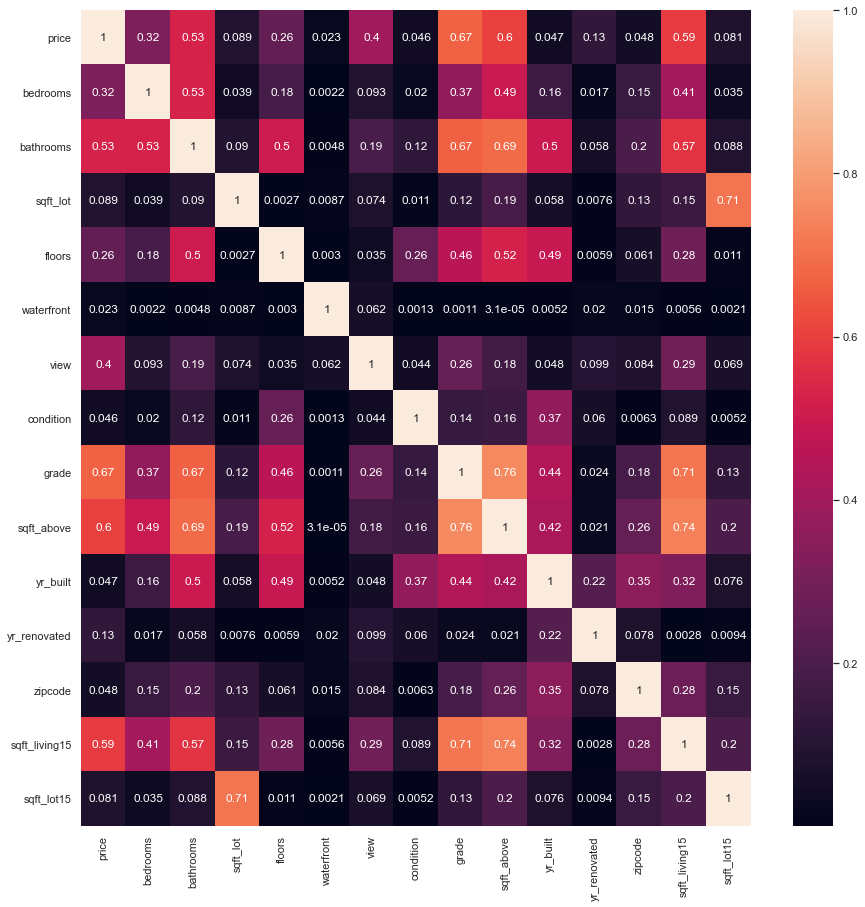

In [ ]:
plt.figure(figsize = (15,15))
sns.set(style = "white")
sns.heatmap(df_new.corr().abs(), annot = True)
plt.savefig("HeatMap_Model2")

HeatMap Analysis:
Grade of the house has the highest correlation with price.Waterfront and zipcode seems to have a negative coorelation.

In [ ]:
main_model(['grade','sqft_above','view','waterfront','bathrooms','yr_built'],df_model2)

Train R2: 0.615633627131986
Test R2: 0.5955821421243408
----
Train RMSE: 227116.79857885407
Test RMSE: 235554.69220834842
        
Model Summary:
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     4322.
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        07:50:01   Log-Likelihood:            -2.2274e+05
No. Observations:               16197   AIC:                         4.455e+05
Df Residuals:                   16190   BIC:                         4.456e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t| 

In [ ]:
df_log = pd.DataFrame()
df_log['price'] = df_model2['price'].map(lambda x: np.log(x))
df_log['sqft_above'] = df_model2['sqft_above'].map(lambda x: np.log(x))
df_log['yr_built'] = df_model2['yr_built']
df_log['bathrooms'] = df_model2['bathrooms']
df_log['view'] = df_model2['view']
df_log['grade'] = df_model2['grade']
df_log['waterfront'] = df_model2['waterfront']
df_log.head()


price  sqft_above  yr_built  bathrooms  view  grade  waterfront
6405   13.178744    7.539027      1993       2.50     1      8           2
937    12.441145    7.177782      1994       2.50     1      7           2
19076  13.521139    8.283999      1975       4.00     1      9           2
15201  13.208541    7.265430      1949       2.00     1      7           2
13083  12.873902    7.461640      1980       2.25     1      8           2

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_log)
scaled_df1 = pd.DataFrame(scaled)
column_dict = dict(zip(scaled_df.columns, df_log.columns))

scaled_df1.rename(columns=column_dict, inplace=True)
scaled_df1.head()

price  sqft_above  yr_built  bathrooms  view  grade  waterfront
0  0.416849    0.502321  0.808696   0.266667   0.0    0.5         1.0
1  0.256231    0.390689  0.817391   0.266667   0.0    0.4         1.0
2  0.491408    0.732533  0.652174   0.466667   0.0    0.6         1.0
3  0.423337    0.417774  0.426087   0.200000   0.0    0.4         1.0
4  0.350467    0.478407  0.695652   0.233333   0.0    0.5         1.0

In [ ]:
main_model(['grade','sqft_above','view','waterfront','bathrooms','yr_built'],scaled_df1)

Train R2: -2.1836351297906518
Test R2: -2.1048240996853784
----
Train RMSE: 653639.379714803
Test RMSE: 652672.1747008335
        
Model Summary:
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     4571.
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        07:58:43   Log-Likelihood:                 20097.
No. Observations:               16197   AIC:                        -4.018e+04
Df Residuals:                   16190   BIC:                        -4.013e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t| 

In [ ]:
# Your code here - remember to use markdown cells for comments as well!